In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
iris = load_iris()

In [2]:
data = iris.data
data = StandardScaler().fit_transform(data)

In [3]:
targets = iris.target

In [4]:
data[0:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [5]:
# 0,1,2 classes

targets[0:5]

array([0, 0, 0, 0, 0])

In [7]:
# average value for each column for each class

mean_vectors = []
for flower_class in range(0,3):
    mean_vectors.append(np.mean(data[targets==flower_class], axis=0))
    print('Mean Vector class %s: %s\n' %(flower_class, mean_vectors[flower_class]))

Mean Vector class 0: [-1.01457897  0.84230679 -1.30487835 -1.25512862]

Mean Vector class 1: [ 0.11228223 -0.65718442  0.28508673  0.16740892]

Mean Vector class 2: [ 0.90229674 -0.18512237  1.01979162  1.08771971]



In [8]:
# we are adding columns to 4x4 matrix where we multiply how much each of these values deviates from class avg multiplied by transposed vector
# matrix of deviations for given class within a column across each other
within_class_matrix = np.zeros((4,4))
for flower_class, mean_vector in zip(range(0,3), mean_vectors):
    class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
    for row in data[targets == flower_class]:
        row, mv = row.reshape(4,1), mean_vector.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
    within_class_matrix += class_sc_mat                             # sum class scatter matrices
print 'within-class Scatter Matrix:\n', within_class_matrix 

within-class Scatter Matrix:
[[ 57.19414039  38.36522254  16.9597752    9.00954035]
 [ 38.36522254  91.21788053  10.68502072  14.94754387]
 [ 16.9597752   10.68502072   8.80215397   4.67538084]
 [  9.00954035  14.94754387   4.67538084  10.6746122 ]]


In [9]:
# how much are avg in a certain column linking it to a given class

overall_mean = np.mean(data, axis=0)

without_class_matrix = np.zeros((4,4))
for i ,mean_vec in enumerate(mean_vectors): 
    n = data[targets==i+1,:].shape[0]
    mean_vec = mean_vec.reshape(4,1) # make column vector
    overall_mean = overall_mean.reshape(4,1) # make column vector
    without_class_matrix += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print 'between-class Scatter Matrix:\n', without_class_matrix

between-class Scatter Matrix:
[[ 52.09888909 -46.41884437  67.79561537  64.61120734]
 [-46.41884437  57.06860484 -64.32312295 -58.36109471]
 [ 67.79561537 -64.32312295  89.19909813  84.27581143]
 [ 64.61120734 -58.36109471  84.27581143  80.16867994]]


In [10]:
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(within_class_matrix).dot(without_class_matrix))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print '\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real)
    print 'Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real) 


Eigenvector 1: 
[[-0.14919128]
 [-0.15716876]
 [ 0.86348805]
 [ 0.45544301]]
Eigenvalue 1: 2.09e+01

Eigenvector 2: 
[[-0.00191277]
 [ 0.31933192]
 [-0.51546546]
 [ 0.79518477]]
Eigenvalue 2: 1.43e-01

Eigenvector 3: 
[[-0.31841316]
 [-0.09452594]
 [-0.52987268]
 [ 0.74482792]]
Eigenvalue 3: 7.75e-16

Eigenvector 4: 
[[-0.31841316]
 [-0.09452594]
 [-0.52987268]
 [ 0.74482792]]
Eigenvalue 4: 7.75e-16


In [11]:
# looks like first component carries bulk of similarity


# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in decreasing order:\n')
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

20.9046229264
0.142833256676
8.5463739579e-16
8.5463739579e-16


In [12]:
# this explains how discriminatory each transformation makes the data

print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print 'eigenvalue {0:}: {1:}'.format(i+1, (j[0]/eigv_sum.real)*100) 

Variance explained:

eigenvalue 1: 99.3213752036
eigenvalue 2: 0.678624796429
eigenvalue 3: 4.06052583437e-15
eigenvalue 4: 4.06052583437e-15


In [13]:
# transformation of data for each row
# now have 2 columns instead of 4. maximizes distance
# doing the same work as all the columns with less 

W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print 'Matrix W:\n', W.real

Matrix W:
[[-0.14919128 -0.00191277]
 [-0.15716876  0.31933192]
 [ 0.86348805 -0.51546546]
 [ 0.45544301  0.79518477]]


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

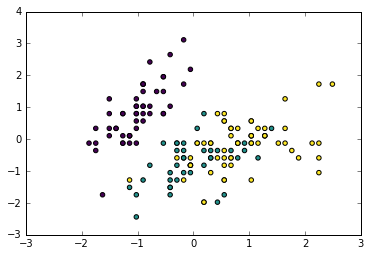

In [28]:
# I did something wrong

plt.scatter(data[:,0], data[:, 1],
            c=targets,
           cmap='viridis')

Above is the long way to code LDA

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [23]:
lda_sk = LinearDiscriminantAnalysis(n_components=2).fit_transform(data, targets)

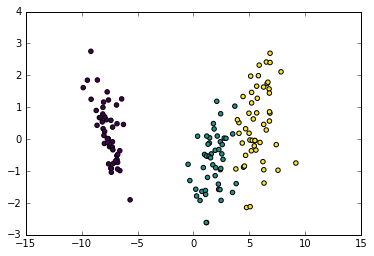

In [24]:
plt.scatter(lda_sk[:,0], lda_sk[:, 1],
           c=targets, cmap='viridis')